In [2]:
print("Hello World")
import altair as alt
import pandas as pd
import geopandas as gpd # Requires geopandas -- e.g.: conda install -c conda-forge geopandas
alt.data_transformers.enable('json') 

Hello World


ModuleNotFoundError: No module named 'altair'

In [ ]:
csv_file = 'Names_hints/dpt2020.csv'

In [ ]:
# Read the csv file to a dataframe
import pandas as pd
def read_csv(csv_file):
    df = pd.read_csv(csv_file, sep=';')
    return df

data = read_csv(csv_file=csv_file)
data.head(10)

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
5,1,_PRENOMS_RARES,1900,08,4
6,1,_PRENOMS_RARES,1900,09,6
7,1,_PRENOMS_RARES,1900,10,3
8,1,_PRENOMS_RARES,1900,11,11
9,1,_PRENOMS_RARES,1900,12,7


In [ ]:
new_column_names = ['Gender', 'First name', 'Year','Department', 'Number of births']
data.columns = new_column_names
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [ ]:
# drope rows with NaN values
data = data.dropna()
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [ ]:
# drop rows with XXXX values
data = data[data['Year'] != 'XXXX']
data = data[data['Department'] != 'XX']
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [ ]:
# convert the column 'Number of births' to integer, and the column 'Year' to datetime format
data['Number of births'] = data['Number of births'].astype(int)
data['Year'] = pd.to_datetime(data['Year'], format='%Y', errors='coerce').dt.strftime('%Y')
data

,Gender,First name,Year,Department,Number of births
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [ ]:
# Conver Gender to Male and Female instead of 1 and 2

def get_gender(gender):
    if gender == 1 or gender == '1':
        return "Male"
    elif gender == 2 or gender == '2':
        return "Female"
    return "No binary"

data['Gender'] = data['Gender'].apply(get_gender)


In [ ]:
# drop First name is "_PRENOMS_RARES"

data = data[data['First name'] != '_PRENOMS_RARES']
data

,Gender,First name,Year,Department,Number of births
10885,Male,AADIL,1983,84,3
10886,Male,AADIL,1992,92,3
10888,Male,AAHIL,2016,95,3
10892,Male,AARON,1962,75,3
10893,Male,AARON,1976,75,3
...,...,...,...,...,...
3727545,Female,ZYA,2013,44,4
3727546,Female,ZYA,2013,59,3
3727547,Female,ZYA,2017,974,3
3727548,Female,ZYA,2018,59,3


In [ ]:
data['First name'] = data['First name'].str.lower().str.capitalize()
data

/var/folders/8g/t8wy73fj2q50qgk6zjj5x1rr0000gn/T/ipykernel_39141/1179538250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['First name'] = data['First name'].str.lower().str.capitalize()


,Gender,First name,Year,Department,Number of births
10885,Male,Aadil,1983,84,3
10886,Male,Aadil,1992,92,3
10888,Male,Aahil,2016,95,3
10892,Male,Aaron,1962,75,3
10893,Male,Aaron,1976,75,3
...,...,...,...,...,...
3727545,Female,Zya,2013,44,4
3727546,Female,Zya,2013,59,3
3727547,Female,Zya,2017,974,3
3727548,Female,Zya,2018,59,3


In [ ]:
# write  dataframe to csv file
def write_csv(df, filename='data.csv'):
    try:
        df.to_csv(filename, index=False)
    except Exception as e:
        raise e

write_csv(data, 'data1.csv')


In [ ]:
# Most popular Female name in 2019
year = '2019'
gender = 'Female'
number_items = 10
most_popular_female_name_2019 = data[(data['Year'] == year) & (data['Gender'] == gender)].sort_values(by='Number of births', ascending=False).head(number_items)


<Axes: ylabel='Number of births'>

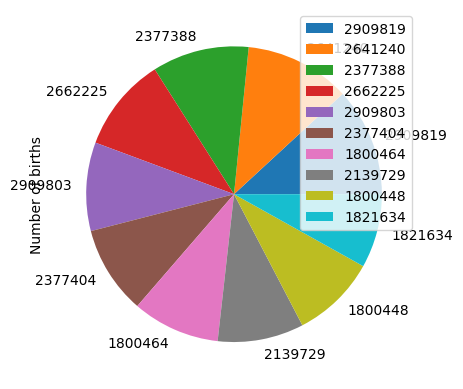

In [ ]:
# plot most popular name in pie chart where the size of the pie is the number of births and with First name as label
most_popular_female_name_2019.plot(kind='pie',y='Number of births')


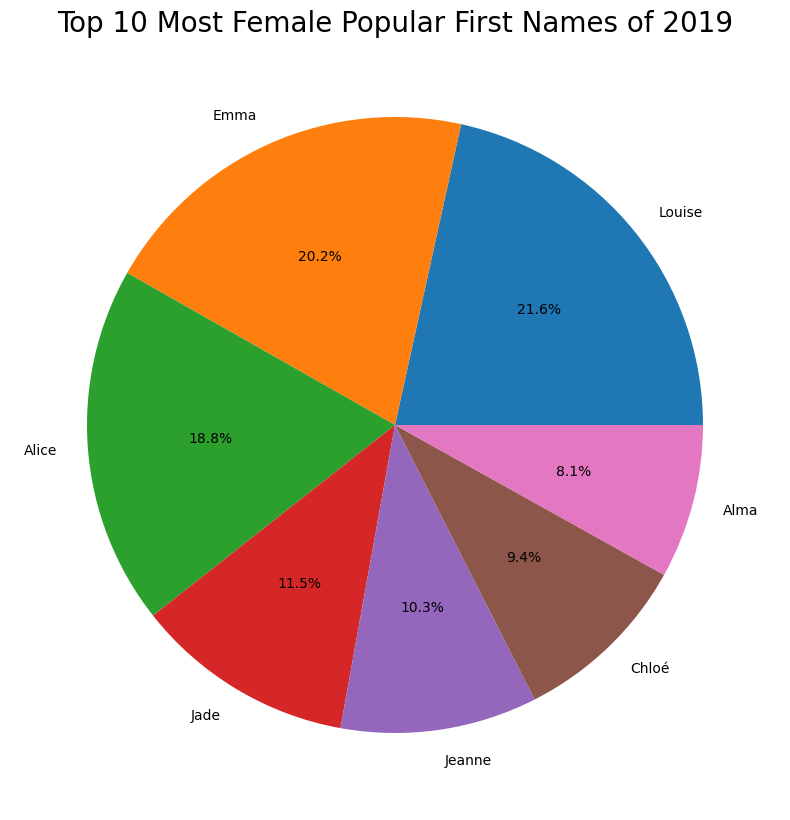

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# First, we'll group the data by first name and sum up the number of births
grouped = most_popular_female_name_2019.groupby('First name')['Number of births'].sum()

# Then, let's sort it to get the most popular names
sorted_grouped = grouped.sort_values(ascending=False)

# For the pie chart, let's take the top 10 most popular names
top_10 = sorted_grouped[:10]

# Now we can plot the pie chart
plt.figure(figsize=(10,10))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%')
title = f"Top {number_items} Most {gender} Popular First Names of {year}"
plt.title(title, fontsize=20)
plt.show()

<Axes: xlabel='First name'>

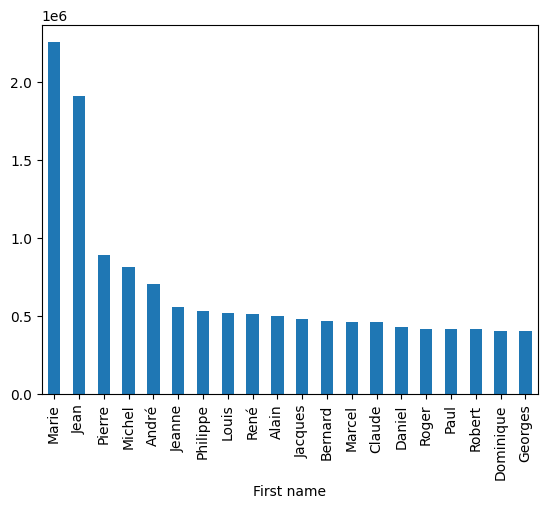

In [ ]:
# list of 20 most popular Female names all time
number_items = 20
gender = 'Female'

most_popular_name = data.groupby('First name')['Number of births'].sum().sort_values(ascending=False).head(number_items)
most_popular_name.plot(kind='bar',y='Number of births')

In [ ]:
# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# Filter the data for only rows where the gender is Female
female_data = data[data['Gender'] == 'Female']

# Group the data by first name and sum up the number of births
grouped_female_data = female_data.groupby('First name')['Number of births'].sum()

# Sort the data in descending order
sorted_female_data = grouped_female_data.sort_values(ascending=False)

# Get the top 20 most popular female names
top_20_female_names = sorted_female_data[:20]

print(top_20_female_names)

First name
Marie         2231903
Jeanne         556897
Françoise      399509
Monique        397739
Catherine      391518
Nathalie       379691
Isabelle       374129
Jacqueline     370277
Anne           362614
Sylvie         361407
Martine        317470
Madeleine      301884
Nicole         290993
Suzanne        286507
Hélène         279677
Christine      277489
Louise         268583
Marguerite     268063
Denise         261567
Christiane     257396
Name: Number of births, dtype: int64


<Axes: title={'center': 'Popularity of Marie over time'}, xlabel='Year'>

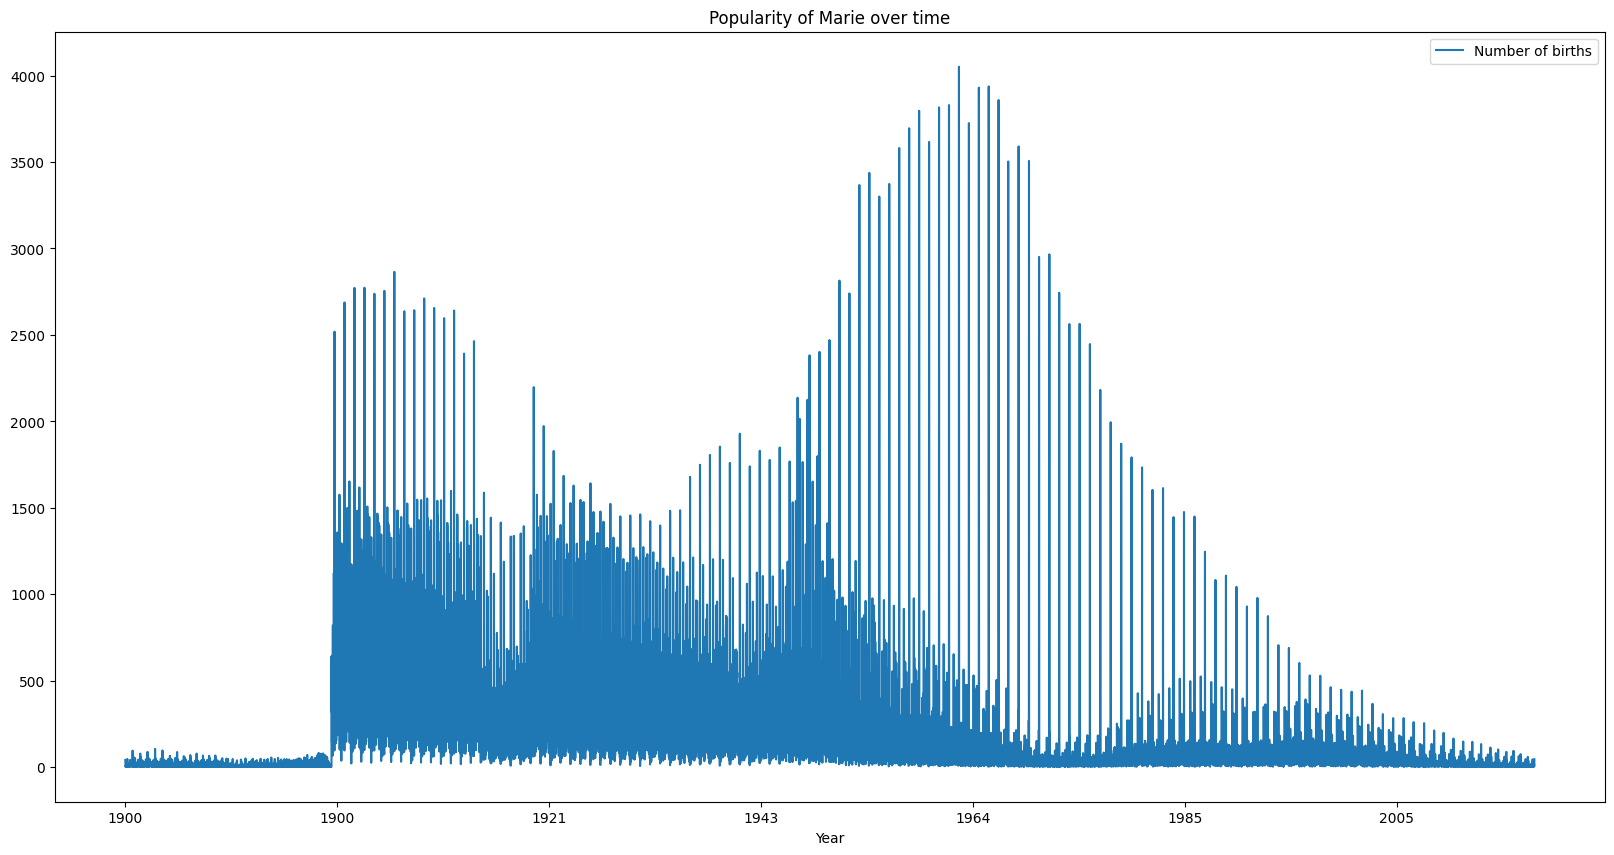

In [ ]:
# evaluation of Marie popularity over time

name = 'Marie'
data[data['First name'] == name].plot(kind='line',x='Year',y='Number of births', title=f"Popularity of {name} over time", figsize=(20,10))

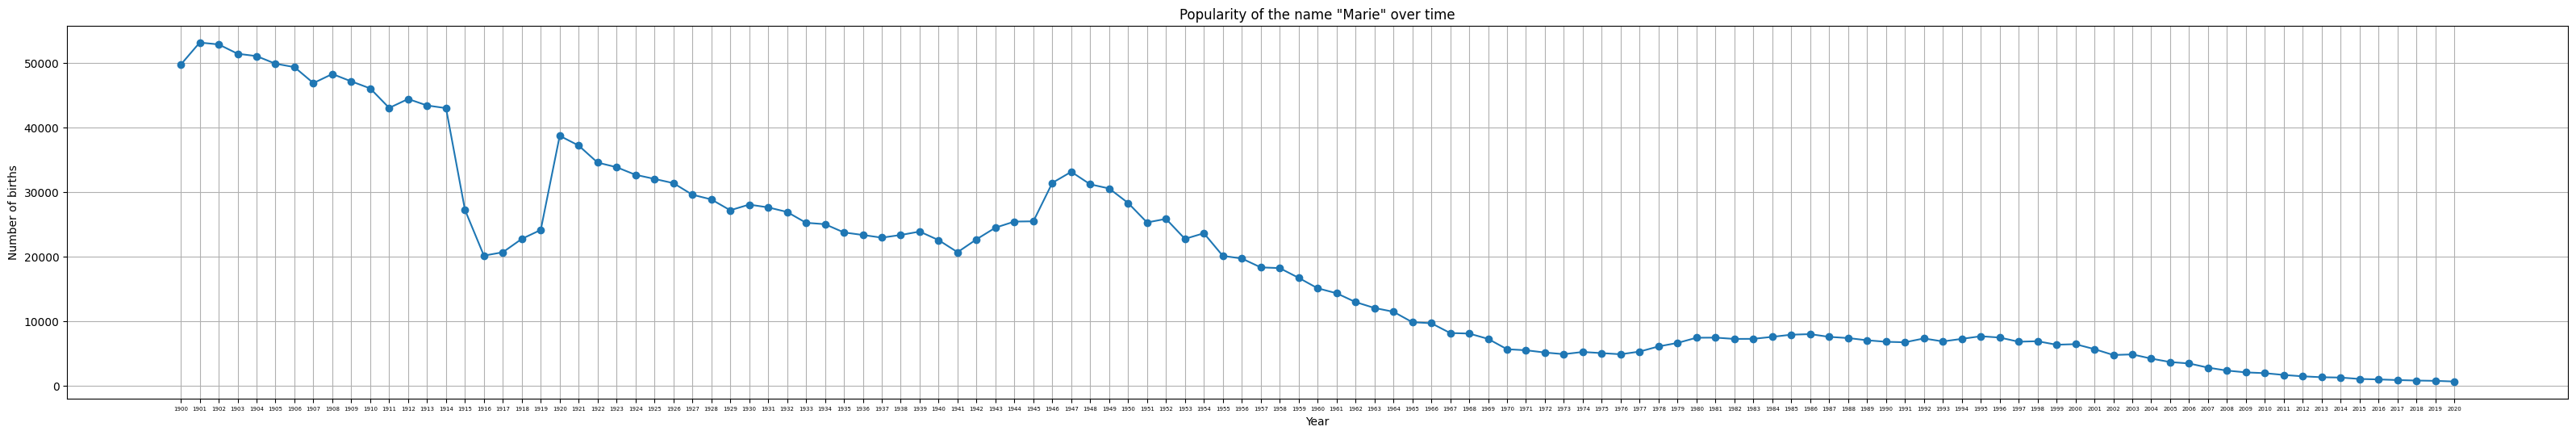

In [ ]:


# Assuming you have a pandas DataFrame named 'df' with your data
# If your data is in a csv file, you can read it into a DataFrame with pd.read_csv('yourfile.csv')

# Filter the data for only rows where the first name is "Marie"
marie_data = data[data['First name'] == 'Marie']

# Group the data by year and sum up the number of births
grouped_marie_data = marie_data.groupby('Year')['Number of births'].sum()

# Plot the data
plt.figure(figsize=(40,6))
plt.xticks(fontsize=5)
plt.plot(grouped_marie_data.index, grouped_marie_data, marker='o')
plt.title('Popularity of the name "Marie" over time')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.grid()
plt.show()


In [ ]:
geo_file = 'Names_hints/departements-version-simplifiee.geojson'
depts = gpd.read_file(geo_file)

depts.sample(5)

,code,nom,geometry
78,78,Yvelines,"POLYGON ((2.20059 48.90868, 2.16838 48.89508, ..."
95,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.57203 49.06149, ..."
8,09,Ariège,"POLYGON ((1.68842 43.27355, 1.70075 43.26054, ..."
86,86,Vienne,"POLYGON ((-0.10212 47.06480, -0.09806 47.09135..."
5,06,Alpes-Maritimes,"POLYGON ((6.88743 44.36105, 6.92257 44.35073, ..."


In [ ]:
data.sample(5)

,Gender,First name,Year,Department,Number of births
1772562,Female,Aina,2008,92,3
909098,Male,Joshua,1992,68,4
761627,Male,Jahyan,2011,972,3
2119265,Female,Charlène,1988,74,23
649556,Male,Gilles,1988,62,14


In [ ]:
merged_data = pd.merge(data, depts, left_on='Department', right_on='code')
merged_data.sample(5)

,Gender,First name,Year,Department,Number of births,code,nom,geometry
1084362,Female,Anne,1988,59,185,59,Nord,"MULTIPOLYGON (((3.04040 50.15971, 3.06301 50.1..."
1980245,Male,Sohan,2010,83,7,83,Var,"MULTIPOLYGON (((6.43480 43.01554, 6.45520 43.0..."
843039,Female,Jeannette,1916,13,3,13,Bouches-du-Rhône,"POLYGON ((4.73906 43.92406, 4.82174 43.91283, ..."
1408906,Male,Marc,1944,03,16,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
1154131,Male,Steve,2000,60,3,60,Oise,"POLYGON ((1.78384 49.75831, 1.80898 49.75433, ..."


In [ ]:
grouped_data = merged_data.groupby(['Department', 'First name','Gender'], as_index=False).agg({'Number of births': 'sum'})
grouped_data = depts.merge(grouped_data, left_on='code', right_on='Department')
grouped_data.sample(5)

,code,nom,geometry,Department,First name,Gender,Number of births
157653,74,Haute-Savoie,"POLYGON ((6.80252 45.77837, 6.75551 45.76635, ...",74,Eugène,Male,550
132331,63,Puy-de-Dôme,"POLYGON ((2.56538 46.14303, 2.64069 46.11848, ...",63,Zyad,Male,3
103998,54,Meurthe-et-Moselle,"POLYGON ((5.47091 49.49721, 5.54118 49.51526, ...",54,Anne-lise,Female,122
2845,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",02,Joanna,Female,13
98328,50,Manche,"POLYGON ((-1.11962 49.35557, -1.11346 49.32795...",50,Thomas,Male,2437


In [ ]:
import pandas as pd
import pyarrow as pa
from shapely import wkt

grouped_data_2 = grouped_data

grouped_data_2['geometry'] = grouped_data_2['geometry'].apply(lambda x: str(x))


/Users/hamzeghalebi/Documents/GitHub/mini-project-data-visualization/.env/lib/python3.9/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [ ]:
name = 'Marie'


subset = grouped_data[grouped_data['First name'] == name]
alt.Chart(subset).mark_geoshape(stroke='white').encode(
    tooltip=['nom', 'code', 'Number of births'],
    color='Number of births',
).properties(width=800, height=600, title=f'Popularity of the name {name} over time')


NameError: name 'grouped_data' is not defined